# Safari Challenge (Here Image size is not same)

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


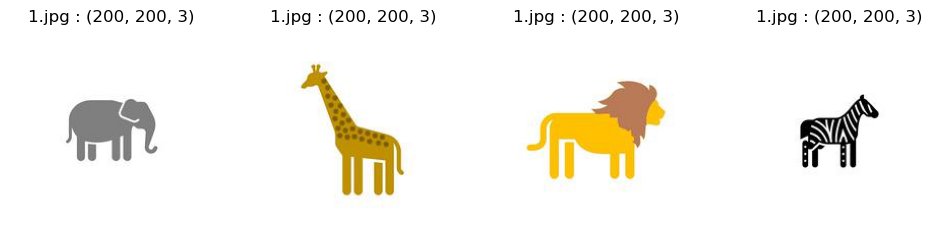

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'C:/Users/DELL/Downloads/2024/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

In [2]:
#check number of image for each catalog
for i in os.listdir(data_path):
    print(f"{i} have {len(os.listdir(os.path.join(data_path, i)))} images")

elephant have 99 images
giraffe have 99 images
lion have 99 images
zebra have 99 images


In [3]:
# Your Code to train a CNN model...
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #preprocessing is used becoz we have large pikcle value

img_size = (200,200)
batch_size = 11
tf.random.set_seed(0)

datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)  #value is 0-255, black ~0, white ~255. here we are normalize the value b/w 0 and 1

#here we are split training data in train and validation
train_gen = datagen.flow_from_directory(data_path,
                                         target_size = img_size,
                                         batch_size = batch_size,
                                         class_mode = 'categorical', #here we have multiclass, if binary then binary take
                                         subset = 'training')

#Validation
test_gen = datagen.flow_from_directory(data_path,
                                        target_size = img_size,
                                        batch_size = batch_size,
                                        class_mode = 'categorical', 
                                        subset = 'validation')


Found 280 images belonging to 4 classes.
Found 116 images belonging to 4 classes.


In [4]:
class_name = list(train_gen.class_indices.keys())
class_name

['elephant', 'giraffe', 'lion', 'zebra']

In [5]:
#resnet is a bydefault trained model (we have multiple ResNet model like 50,100,150..), here we are importing resnet 50

from tensorflow.keras.applications.resnet import ResNet50
## include_top == False means model without output layer
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (200,200,3)) #Imagenet image is similar to our dataset (image), that is why we used imagenet
print(base_model.summary())

#In output Trainable params-mean these dataset require training, non-trainable params mean these no. of dataset not required training

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 206, 206,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 100, 100,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 100, 100,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 100, 100,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 102, 102,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 50, 50,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 50, 50,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 50, 50,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 50, 50,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 50, 50,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 50, 50,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 50, 50,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 50, 50,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 50, 50,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [6]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
x = Flatten()(x)
output_layer = Dense(4, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = output_layer)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 206, 206,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 100, 100,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 100, 100,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 100, 100,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 102, 102,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 50, 50,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 50, 50,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 50, 50,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 50, 50,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 50, 50,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 50, 50,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 50, 50,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 50, 50,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 50, 50,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_3_c

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
num_epochs = 10
history = model.fit(train_gen,
            steps_per_epoch = train_gen.samples//batch_size,
            validation_data = test_gen, 
            validation_steps = test_gen.samples//batch_size,
            epochs = num_epochs)

Epoch 1/10


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - acc: 0.3317 - loss: 5.9481 - val_acc: 0.9000 - val_loss: 0.2377
Epoch 2/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - acc: 1.0000 - loss: 0.0580

C:\Users\DELL\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 1.0000 - loss: 0.0580 - val_acc: 0.6667 - val_loss: 0.4244
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.7712 - loss: 0.6836 - val_acc: 0.8000 - val_loss: 0.9682
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9091 - loss: 0.2742 - val_acc: 0.8333 - val_loss: 0.7166
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - acc: 0.9044 - loss: 0.3368 - val_acc: 0.8545 - val_loss: 0.1811
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.5455 - loss: 0.4717 - val_acc: 0.8333 - val_loss: 0.2441
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - acc: 0.8241 - loss: 0.9894 - val_acc: 0.7182 - val_loss: 1.0495
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.6364 - loss: 1.2237 - val_acc: 0.8333 - val_loss: 0.8132
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9175 - loss: 0.2140 - val_acc: 1.0000 - val_loss: 0.0719
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 1.0000 - loss: 0.077

## Save your model

Add code below to save your model's trained weights.

In [8]:
modelFileName = 'C:/Users/DELL/Downloads/2024/Model/safari1.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as C:/Users/DELL/Downloads/2024/Model/safari1.h5


## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


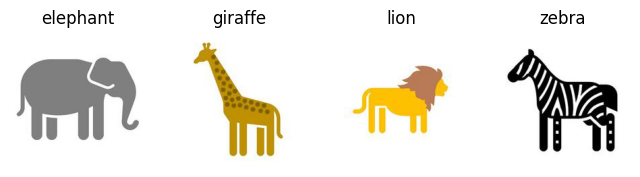

In [23]:
# Function to predict the class of an image
def predict_image(classifier, image):
    import numpy
    
    # Default value
    index = 0
    
    # !!Add your code here to predict an image class from your model!!
    ## Have to remember model always assume you input as batch, must add new axis if only has one data!!!!!
    ## and remember to ensure the datatype and normalize (because generator load data as float and have normalize)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = image.astype('float32')
    image /= 255
    index = np.argmax(classifier.predict(image))
    # Return the predicted index
    return index


# Load your model
model = tf.keras.models.load_model('C:/Users/DELL/Downloads/2024/Model/safari1.h5')

# The images are in the data/shapes folder
test_data_path = 'data/safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, img)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!

# Lab exercise

### Dataset: 
https://www.kaggle.com/code/arbazkhan971/image-classification-using-cnn-94-accuracy/input

### Problem Definition: 
    
Design a DCNN bsed Image Classification model  